In [4]:
import pandas as pd
import numpy as np

In [10]:
CarPrice = 'C:\\Users\\devang\\Desktop\\CarPrice.csv'

In [11]:
df_Car = pd.read_csv(CarPrice)

In [12]:
print(df_Car)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [13]:
#find missing values if any
missing_Car = df_Car.isnull().sum()


In [14]:
print("Number of missing values for each column in df_Car:")
print(missing_Car)

Number of missing values for each column in df_Car:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [15]:
#there are no missing values 

In [17]:
#drop the coloums we are not using in visualization 
columns_to_drop = ['boreratio', 'compressionratio', 'aspiration', 'symboling','enginesize','fuelsystem']
df_Car_dropped = df_Car.drop(columns = columns_to_drop)


In [18]:
#display data
print(df_Car_dropped.head())

   car_ID                   CarName fueltype doornumber      carbody  \
0       1        alfa-romero giulia      gas        two  convertible   
1       2       alfa-romero stelvio      gas        two  convertible   
2       3  alfa-romero Quadrifoglio      gas        two    hatchback   
3       4               audi 100 ls      gas       four        sedan   
4       5                audi 100ls      gas       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  stroke  horsepower  peakrpm  citympg  \
0        2548       dohc           four  

In [21]:
# Categorical columns to be one-hot encoded
categorical_columns = ['CarName', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_Car_dropped, columns=categorical_columns)

# Display the one-hot encoded DataFrame
print(df_encoded)

     car_ID  wheelbase  carlength  carwidth  carheight  curbweight  stroke  \
0         1       88.6      168.8      64.1       48.8        2548    2.68   
1         2       88.6      168.8      64.1       48.8        2548    2.68   
2         3       94.5      171.2      65.5       52.4        2823    3.47   
3         4       99.8      176.6      66.2       54.3        2337    3.40   
4         5       99.4      176.6      66.4       54.3        2824    3.40   
..      ...        ...        ...       ...        ...         ...     ...   
200     201      109.1      188.8      68.9       55.5        2952    3.15   
201     202      109.1      188.8      68.8       55.5        3049    3.15   
202     203      109.1      188.8      68.9       55.5        3012    2.87   
203     204      109.1      188.8      68.9       55.5        3217    3.40   
204     205      109.1      188.8      68.9       55.5        3062    3.15   

     horsepower  peakrpm  citympg  ...  enginetype_ohcf  engine

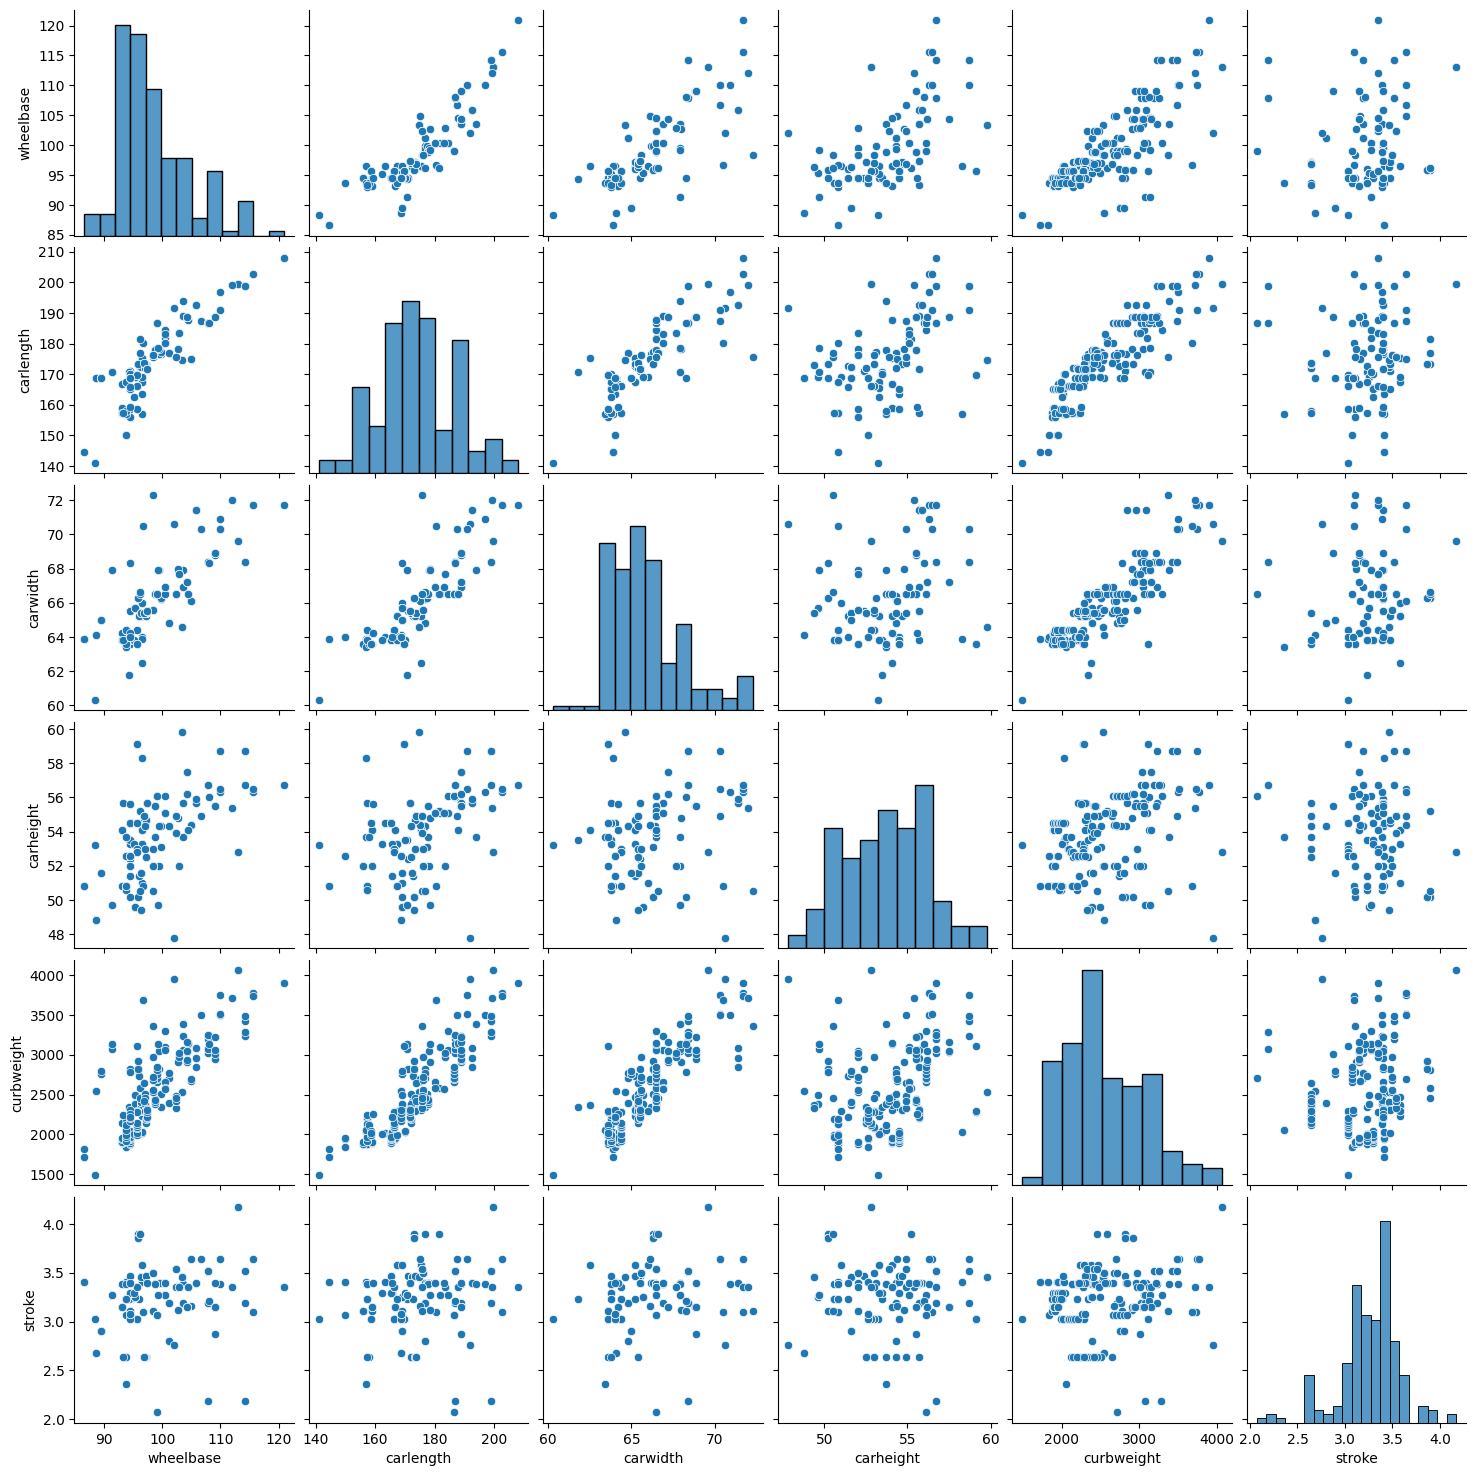

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for numerical variables
sns.pairplot(df_encoded[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'stroke']])
plt.show()




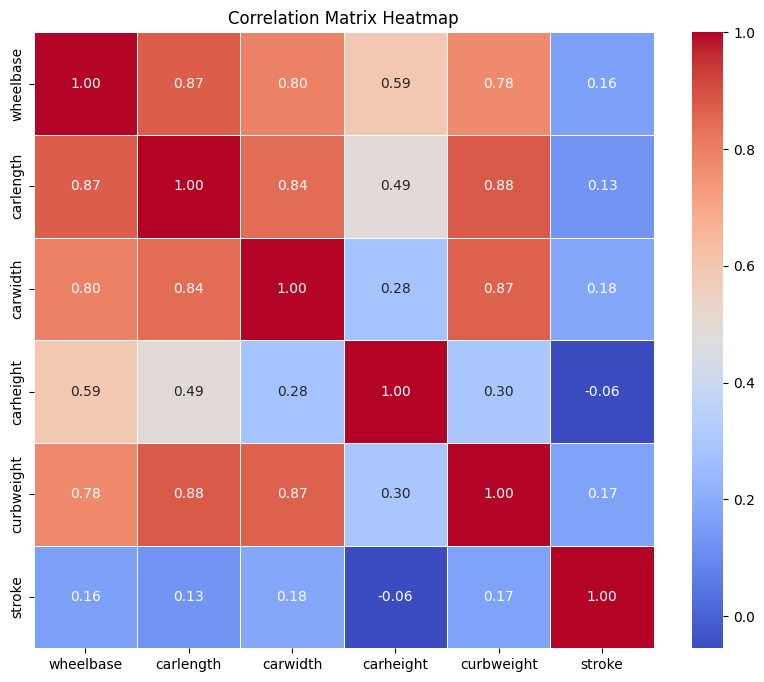

In [33]:
# Heatmap for correlation matrix
correlation_matrix = df_encoded[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'stroke']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

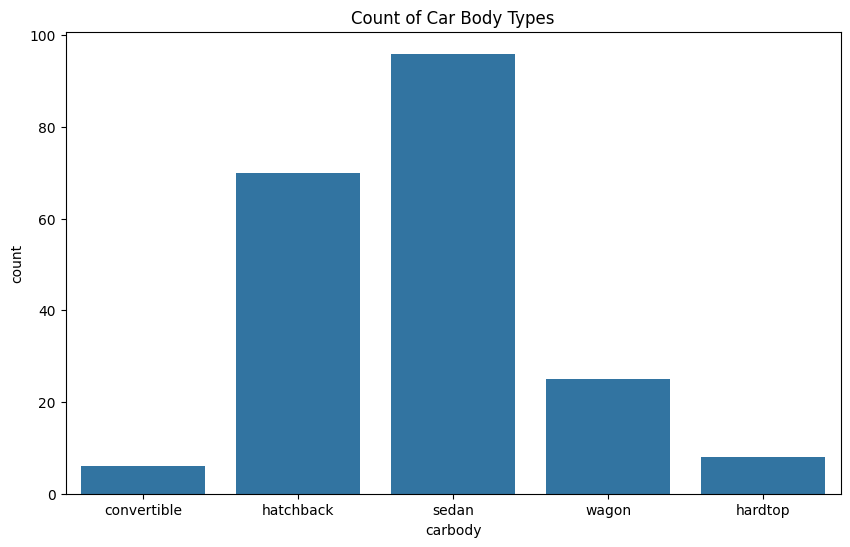

In [37]:
# Countplot for a categorical variable (e.g., carbody)
plt.figure(figsize=(10, 6))
sns.countplot(x='carbody', data=df_Car_dropped)
plt.title('Count of Car Body Types')
plt.show()
#here we used df_Car_dropped as we hot encoded numerical value in df_encoded and we need categorial value 


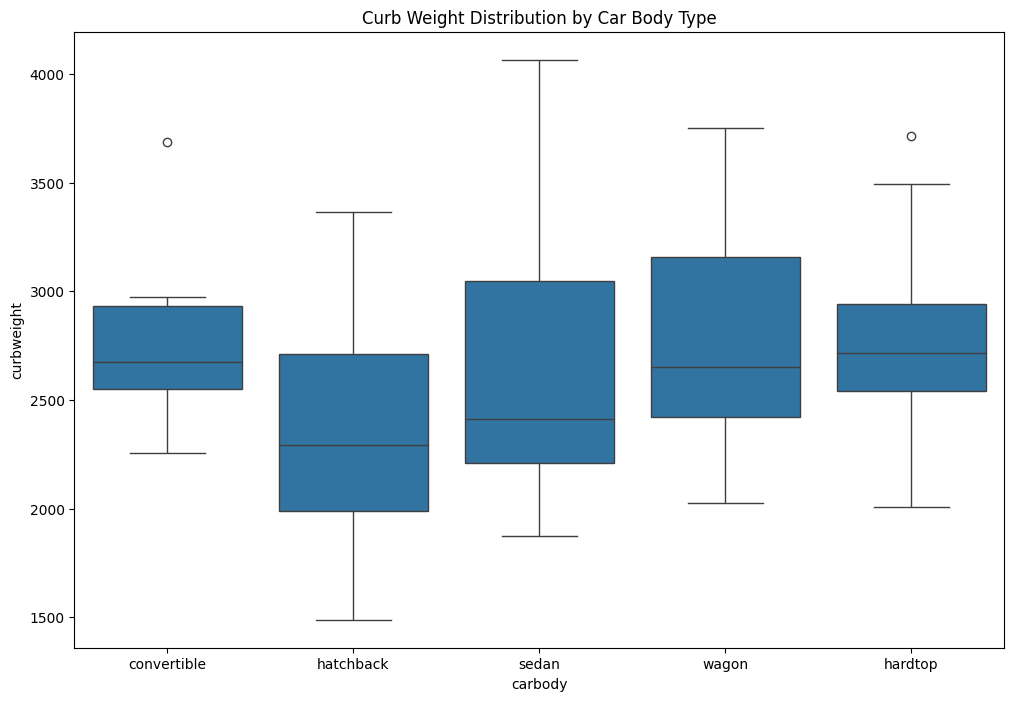

In [39]:
# Boxplot for numerical variable vs. categorical variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='carbody', y='curbweight', data=df_Car_dropped)
plt.title('Curb Weight Distribution by Car Body Type')
plt.show()

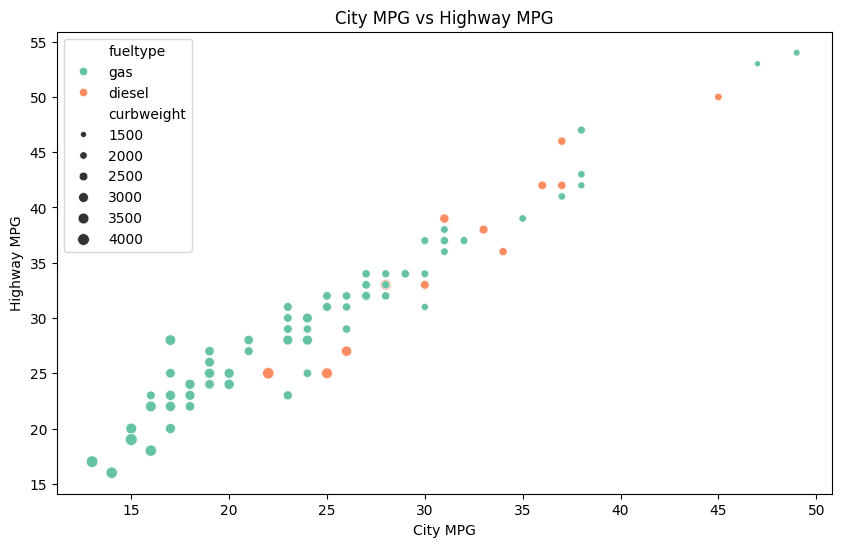

In [43]:
# Scatter plot for citympg vs highwaympg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='citympg', y='highwaympg', data=df_Car_dropped, hue='fueltype', palette='Set2', size='curbweight')
plt.title('City MPG vs Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()


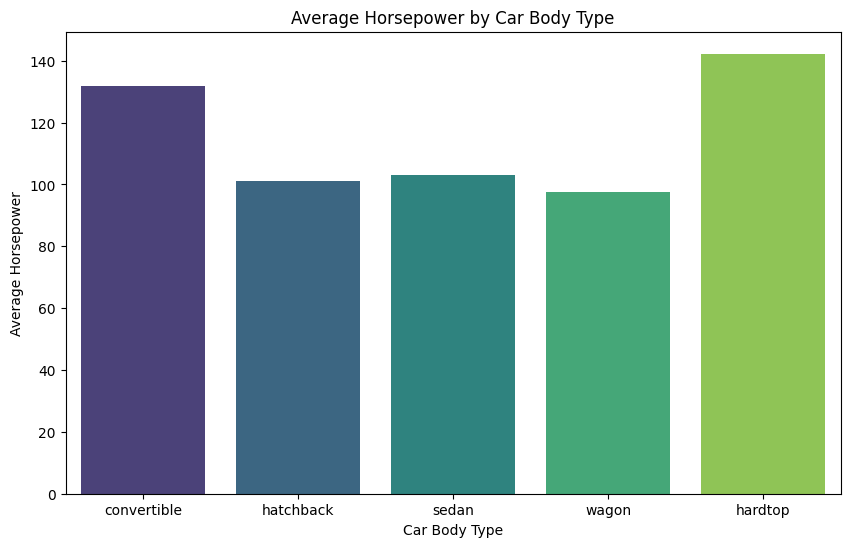

In [50]:
# Bar plot for average horsepower by car body type
plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='horsepower', data=df_Car_dropped, errorbar =None, hue='carbody', palette='viridis', legend=False)
plt.title('Average Horsepower by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average Horsepower')
plt.show()



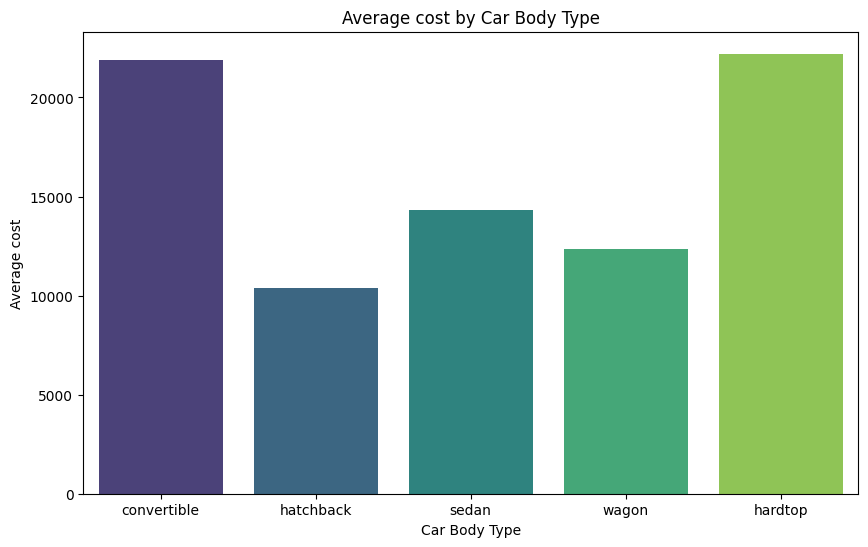

In [52]:
# Bar plot for average cost by car body type
plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='price', data=df_Car_dropped, errorbar =None, hue='carbody', palette='viridis', legend=False)
plt.title('Average cost by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Average cost')
plt.show()


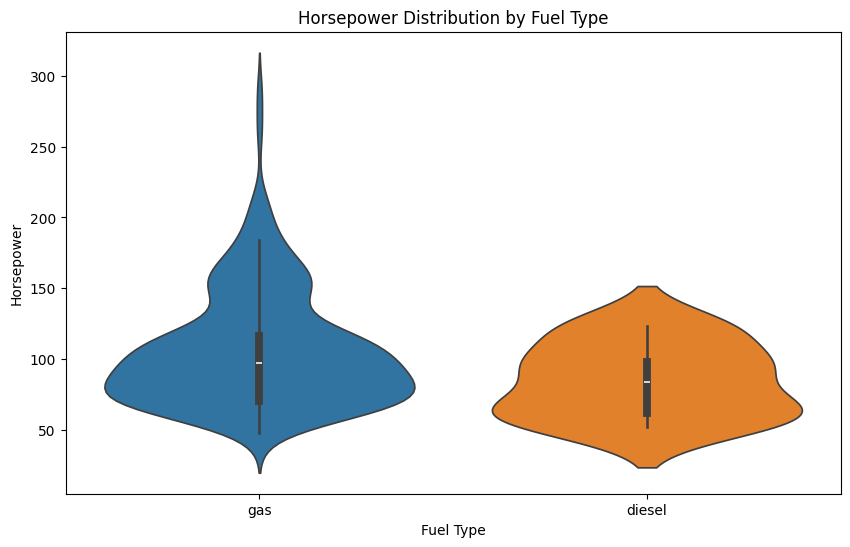

In [54]:
# Violin plot for horsepower distribution by fuel type
plt.figure(figsize=(10, 6))
sns.violinplot(x='fueltype', y='horsepower', data=df_Car_dropped, hue = 'fueltype',legend=False)
plt.title('Horsepower Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Horsepower')
plt.show()
